## Applied

### 8

1. This question involves the use of simple linear regression on the Auto data set.
    1. Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output.
    
     For example:
     
        1. Is there a relationship between the predictor and the response?
        1. How strong is the relationship between the predictor and the response?
        1. Is the relationship between the predictor and the response positive or negative?
        1. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
        
    1. Plot the response and the predictor. Use the abline() function to display the least squares regression line.
    1. Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

#### Answers

##### a)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

PATH = './data/'
auto = pd.read_csv(f'{PATH}Auto.csv',sep=',')
auto.loc[auto['horsepower'] == '?','horsepower'] = np.nan
auto['horsepower'] = auto['horsepower'].astype(float)
auto.dropna(inplace=True)
auto.reset_index(inplace=True,drop=True)

/home/florian/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
y = auto['mpg']
X = auto['horsepower']
X = sm.add_constant(X)

mod = sm.OLS(y,X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           7.03e-81
Time:                        08:23:22   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a strong negative relationship between the predictor and the response. The p-value is close to 0.

In [3]:
x = np.array([98])
x = sm.add_constant(x, has_constant='add')
mod.predict(x)

array([24.46707715])

##### b)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

##### b)

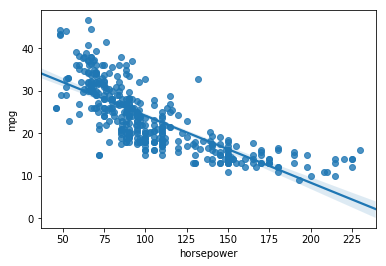

In [5]:
sns.regplot(x='horsepower', y='mpg', data=auto)

##### c)

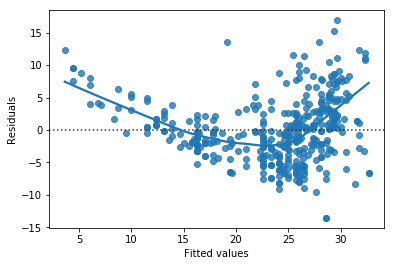

In [6]:
ax = sns.residplot(x=mod.fittedvalues, y=y, lowess=True)
ax.set(xlabel='Fitted values',ylabel='Residuals')
plt.show()

There is a strong pattern in the data which indicates a non-linearity. The fit should include a quadratic transformation.

### 9

1. This question involves the use of multiple linear regression on the Auto data set. 
    1. Produce a scatterplot matrix which includes all of the variables in the data set.
    1. Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.
    1. Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as thepredictors. Use the summary() function to print the results. Comment on the output. For instance:
        1. Is there a relationship between the predictors and the response?
        1. Which predictors appear to have a statistically significant relationship to the response?
        1. What does the coefficient for the year variable suggest?
    1. Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
    1. Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
    1. Try a few different transformations of the variables, such as log(X),√X,X^2. Comment on your findings.

#### Answers

##### a)

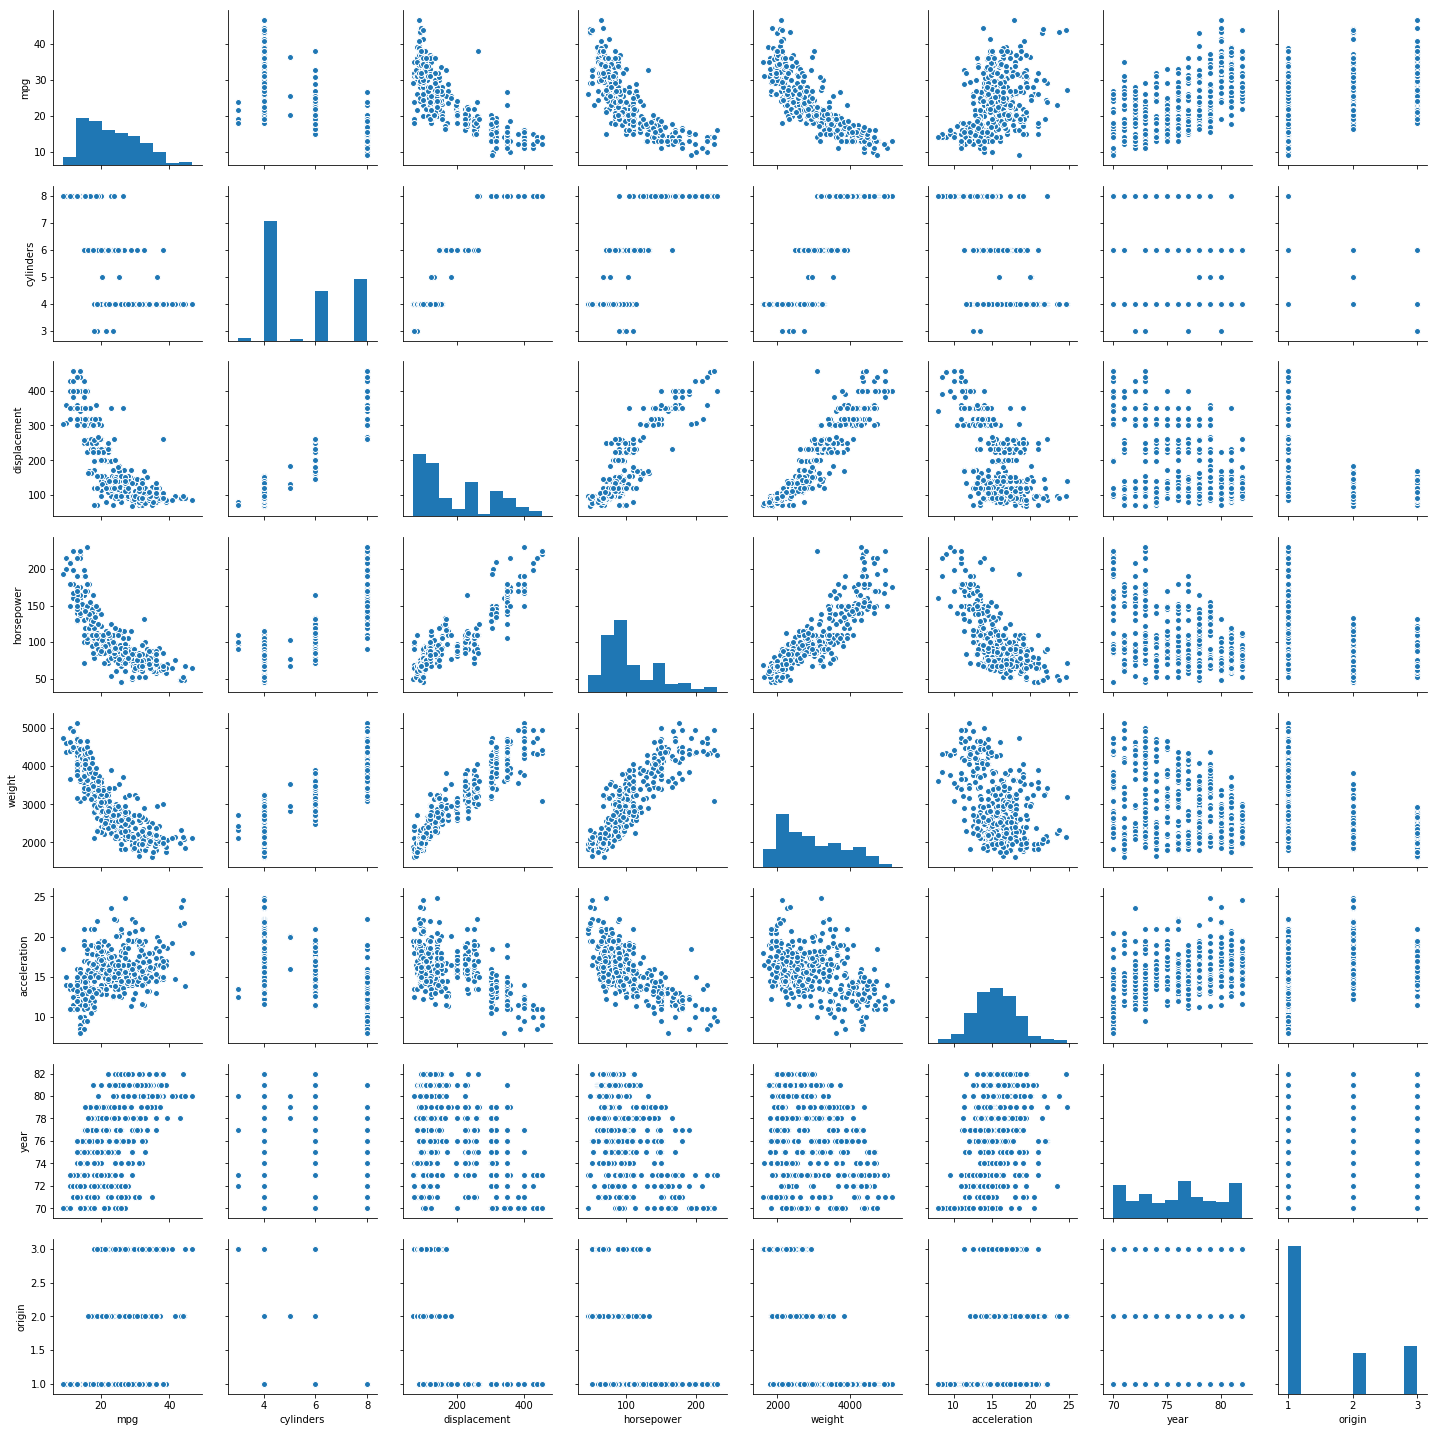

In [7]:
sns.pairplot(auto)

##### b)

In [8]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


##### c)

In [9]:
y = auto['mpg']

In [10]:
X = auto.drop(['mpg','name'], axis=1)
X = sm.add_constant(X)

In [11]:
mod = sm.OLS(y, X).fit()

In [12]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 26 Nov 2018   Prob (F-statistic):          2.04e-139
Time:                        08:23:28   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F-statistic is very low - this indicates a relationship between the predictors and the response.  
Significant predictors are: _displacement, weight, year, origin_.  
The coefficient of the _year_ variable suggests a higher _mpg_ for younger cars.

##### d)

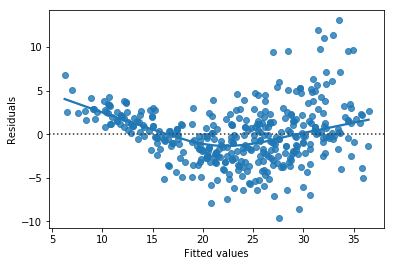

In [13]:
ax = sns.residplot(mod.fittedvalues,y,lowess=True)
ax.set(xlabel='Fitted values', ylabel='Residuals')
plt.show()

There is a non linear relationship between the predictors and the response. _TODO_ Add more plots.

##### e)

In [14]:
import statsmodels.formula.api as smf

In [15]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
mod = smf.ols("mpg ~ C(cylinders) + displacement * horsepower + weight + acceleration + year + C(origin)", data=auto).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     214.0
Date:                Mon, 26 Nov 2018   Prob (F-statistic):          1.85e-160
Time:                        08:23:28   Log-Likelihood:                -959.23
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     379   BIC:                             1996.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.1550      4.571     -1.347      0.179     -15.142       2.832
C(cylinders)[T.4]           6.8586      1.518      4.518      0.000       3.874       9.844
C(cylinders)[T.5]           8.0807      2.313      3.494      0.001       3.533      12.628
C(cylinders)[T.6]           6.7977      1.723      3.945      0.000       3.410      10.186
C(cylinders)[T.8]           8.5930      1.979      4.342      0.000       4.702      12.484
C(origin)[T.2]              0.7287      0.521      1.400      0.162      -0.295       1.752
C(origin)[T.3]              1.6098      0.498      3.231      0.001       0.630       2.590
displacement               -0.0647      0.012     -5.458      0.000      -0.088      -0.041
horsepower                 -0.1791      0.021     -8.578      0.000      -0.220      -0.138
displacement:horsepower     0.0005   5.35e-05      8.488      0.000       0.000       0.001
weight                     -0.0031      0.001     -4.643      0.000      -0.004      -0.002
acceleration               -0.2257      0.090     -2.497      0.013      -0.403      -0.048
year                        0.7237      0.045     16.107      0.000       0.635       0.812
==============================================================================
Omnibus:                       62.594   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.045
Skew:                           0.831   Prob(JB):                     1.06e-30
Kurtosis:                       5.385   Cond. No.                     1.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The_ displacement * horsepower_ interaction seems to be statistically significant.

##### f)

In [17]:
mod = smf.ols("mpg ~ np.log(horsepower)", data=auto).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           1.70e-95
Time:                        08:23:28   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3.050     35.644      0.000     102.704     114.695
np.log(horsepower)   -18.5822      0.663    -28.034      0.000     -19.885     -17.279
==============================================================================
Omnibus:                       11.919   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.557
Skew:                           0.278   Prob(JB):                     0.000419
Kurtosis:                       3.803   Cond. No.                         64.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the _log_ of horsepower produces a higher R-squared than using horsepower directly.

### 10

1. This question should be answered using the Carseats data set.
    1. Fit a multiple regression model to predict _Sales_ using _Price, Urban, and US._
    1. Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!
    1. Write out the model in equation form, being careful to handle the qualitative variables properly.
    1. For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?
    1. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.  
    1. How well do the models in (a) and (e) fit the data?
    1. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).
    1. Is there evidence of outliers or high leverage observations in the model from (e)?


#### Answers

##### a)

In [18]:
data = pd.read_csv(f"{PATH}/Carseats.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [19]:
mod = smf.ols("Sales ~ Price + C(Urban) + C(US)", data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           2.39e-23
Time:                        08:23:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     20.036      0.000      11.764      14.323
C(Urban)[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
C(US)[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price              -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

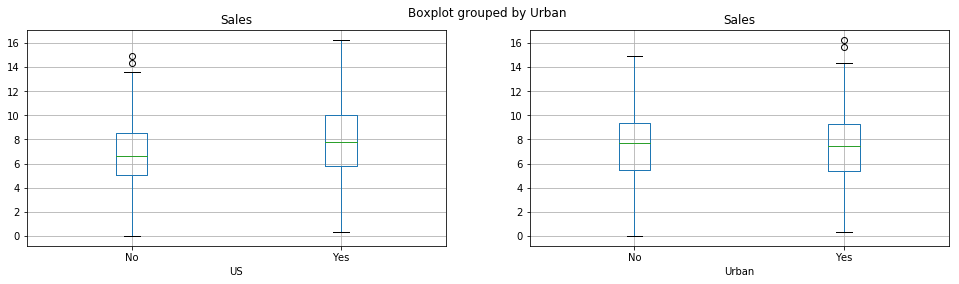

In [20]:
_, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
pd.plotting.boxplot(data,column='Sales',by='US',ax=ax1)
pd.plotting.boxplot(data,column='Sales',by='Urban',ax=ax2)
plt.show()

c) - omitted

#### d)

The hypothesis can be rejected for the predictor _Urban_ because of the large p-value.

##### e)

In [21]:
mod = smf.ols("Sales ~ Price + C(US)", data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           2.66e-24
Time:                        08:23:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652      0.000      11.790      14.271
C(US)[T.Yes]     1.1996      0.258      4.641      0.000       0.692       1.708
Price           -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is the same for both models, the F-statistic is higher in the second model (62.43 vs 41.52).

##### f

The model fit in a is the same in a) as in e): R-squared: 0.239.

##### g

In [22]:
mod.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,11.79032,14.271265
C(US)[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


##### h

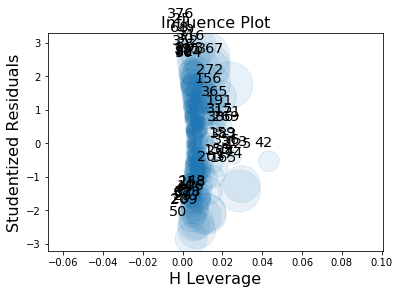

In [23]:
sm.graphics.influence_plot(mod,plot_alpha=0.1)
plt.show()

### 11

1. In this problem we will investigate the t-statistic for the null hypoth- esis H 0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

     ```set . seed (1)
     x = rnorm (100)
     y =2* x + rnorm (100)```
    1.  Perform a simple linear regression of y onto x , without an in- tercept. Report the coefficient estimate β̂, the standard error of this coefficient estimate, and the t-statistic and p-value associ- ated with the null hypothesis H 0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0) .) 
    1. Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H 0 : β = 0. Comment on these results.  
    1.  What is the relationship between the results obtained in (a) and (b)?
    1. For the regression of Y onto X without an intercept, the t- statistic for H 0 : β = 0 takes the form β̂/SE( β̂), where β̂ is given by (3.38), and where
     (These formulas are slightly different from those given in Sec- tions 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numeri- cally in R , that the t-statistic can be written as
    1. Using the results from (d), argue that the t-statistic for the re- gression of y onto x is the same as the t-statistic for the regression of x onto y .
    1. In R , show that when regression is performed with an intercept, the t-statistic for H 0 : β 1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y .


##### a)

In [24]:
x = np.random.normal(size=100)

In [25]:
y = 2 * x + np.random.normal(size=100)

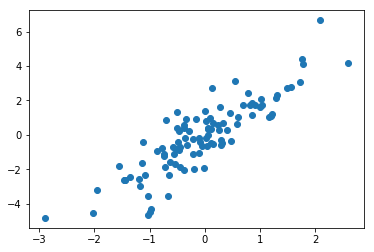

In [26]:
plt.scatter(x,y)
plt.show()

In [27]:
data = pd.DataFrame({'x':x,'y':y})

In [28]:
mod = smf.ols(formula="y ~ x - 1", data=data).fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     303.8
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           6.23e-32
Time:                        08:23:29   Log-Likelihood:                -145.26
No. Observations:                 100   AIC:                             292.5
Df Residuals:                      99   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9338      0.111     17.430      0.000       1.714       2.154
==============================================================================
Omnibus:                        1.411   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.904
Skew:                          -0.016   Prob(JB):                        0.636
Kurtosis:                       3.465   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

See table. We can reject the hypothesis, both variables are dependent. The coefficient is very close to the "expected" coefficient 2.

##### b)

In [29]:
mod = smf.ols(formula="x ~ y - 1", data=data).fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     303.8
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           6.23e-32
Time:                        08:23:29   Log-Likelihood:                -65.208
No. Observations:                 100   AIC:                             132.4
Df Residuals:                      99   BIC:                             135.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3900      0.022     17.430      0.000       0.346       0.434
==============================================================================
Omnibus:                        2.172   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.723
Skew:                          -0.160   Prob(JB):                        0.422
Kurtosis:                       2.442   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient and standard error are different, the t-statistic and p-value are the same in both cases.

##### c)

Why is the coefficient ~.04 and not .5?

The equation from _a_ can be rewritten which shows the relationship:

$$
\begin{align*}
y &= 2x+\epsilon \\
x &= \frac 1 2 (y- \epsilon)
\end{align*}
$$

##### d)

Prove that

$$
\begin{align*}
t = \frac {\hat\beta} {SE(\hat\beta)} \stackrel{?}{=} \frac{\sqrt{(n-1)}\sum_{i=1}^n x_iy_i}{\sqrt{(\sum_{i=1}^n x_i^2)(\sum_{i=1}^n y_i^2)-(\sum_{i=1}^n x_iy_i)^2}}.
\end{align*}
$$
Proof:
$$
\begin{align*}
t &= \frac {\hat\beta} {SE(\hat\beta)} \\
&= \frac{\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}}{\sqrt{\frac{(\sum_{i=1}^ny_i-x_i\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2})^2}{(n-1)\sum_{i=1}^nx_i^2}}} \\
&= \frac{\sqrt{n-1}\sum_{i=1}^nx_iy_i}{\sqrt{\sum_{i=1}^nx_i^2}\sqrt{\sum_{i=1}^n(y_i^2-2x_iy_i\frac{\sum_{i=1}^nx_iy_i}{\sum_{i=1}^nx_i^2}+x_i^2\frac{(\sum_{i=1}^nx_iy_i)^2}{(\sum_{i=1}^nx_i^2)^2})}} \\
&= \frac{\sqrt{(n-1)}\sum_{i=1}^n x_iy_i}{\sqrt{(\sum_{i=1}^n x_i^2)(\sum_{i=1}^n y_i^2)-(\sum_{i=1}^n x_iy_i)^2}}.
\end{align*}
$$

##### e)

As can be easily seen from the result above the $x_i$s and $y_i$s only appear as products. Therefor (by commutativity) the results for the t-statistic are the same.

##### f)

ommitted

### 12

1. This problem involves simple linear regression without an intercept.
    1. Recall that the coefficient estimate β̂ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?
    1. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.
    1. Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.


#### Answer

##### a)

The estimate $\hat\beta$ is to regress $y$ onto $x$ is given by

$$
\begin{align}
\hat\beta = \frac{\sum_{i=1}^nx_iy_i}{\sum_{i'=1}^nx_{i'}^2}.
\end{align}
$$

The answer results from equalling the above formula with the $\hat\beta$ needed to regress $x$ onto $y$:

$$
\begin{align*}
\frac{\sum_{i=1}^nx_iy_i}{\sum_{i'=1}^nx_{i'}^2} &= \frac{\sum_{i=1}^nx_iy_i}{\sum_{i'=1}^ny_{i'}^2} \\
\sum_{i=1}^nx_i^2 &= \sum_{i=1}^ny_i^2
\end{align*}
$$

Based on this equation the coefficient is the same when the sum of the squares of the individual observations are the same.

##### b)

In [30]:
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)
data = pd.DataFrame({'x':x,'y':y})
mod = smf.ols(formula="x ~ y - 1", data=data).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     565.9
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           9.87e-43
Time:                        08:23:29   Log-Likelihood:                -54.167
No. Observations:                 100   AIC:                             110.3
Df Residuals:                      99   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.3932      0.017     23.789      0.000       0.360       0.426
==============================================================================
Omnibus:                        0.847   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.684
Skew:                           0.202   Prob(JB):                        0.710
Kurtosis:                       2.987   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### c)

In [31]:
xSum = np.sum(x**2)
ySum = np.sum(y**2)
xSum,ySum

(116.18227835524182, 639.5096823898015)

In [32]:
newX = np.append(x,np.sqrt(ySum-xSum))
newY = np.append(y,0)
np.sum(newX**2),np.sum(newY**2)

(639.5096823898015, 639.5096823898015)

In [33]:
data = pd.DataFrame({'x':newX,'y':newY})
smf.ols(formula="y ~ x - 1", data=data).fit().params # returns the coef

x    0.393223
dtype: float64

In [34]:
smf.ols(formula="x ~ y - 1", data=data).fit().params # returns the coef

y    0.393223
dtype: float64

### 13

1. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use `random.seed(1)` prior to starting part (a) to ensure consistent results. 

__a.__ Using the `numpy.random.normal`  function, create a vector, $x$ , containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.

In [35]:
import random
import numpy as np

In [36]:
random.seed(1)
x = np.random.normal(size=100)

__b.__ Using the rnorm() function, create a vector, eps , containing 100 observations drawn from a N (0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

In [37]:
eps = np.random.normal(0,0.25,100)

__c.__ Using $x$ and $eps$, generate a vector $y$ according to the model  
    $$Y = -1 + 0.5X+\epsilon$$
    What is the length of the vector $y$? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [38]:
y = -1 + 0.5*x + eps

The length of $y$ is 100, the values are $\beta_0 = -1$ and $\beta_1 = 0.5.$

__d.__ Create a scatterplot displaying the relationship between $x$ and $y$. Comment on what you observe.

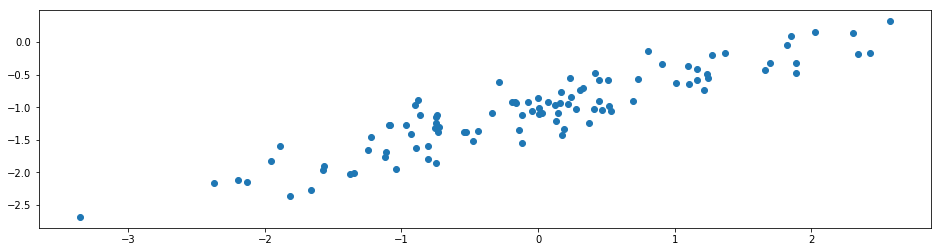

In [39]:
plt.figure(figsize=(16,4))
plt.scatter(x,y)
plt.show()

__e.__ Fit a least squares linear model to predict y using x . Comment on the model obtained. How do $\hat\beta_0$ and $\hat\beta_1$ compare to $\beta_0$ and $\beta_1$?

In [40]:
df = pd.DataFrame({'x' : x, 'y':y})
mod = smf.ols(formula='y ~ x',data=df).fit()
mod.params

Intercept   -1.045736
x            0.479943
dtype: float64

The estimated parameters $\hat\beta_0 = -0.97, \hat\beta_1 = 0.51$ are very close to the actual parameters $\beta_0 = -1, \beta_1 = 0.5$.

__f.__ Display the least squares line on the scatterplot obtained in __(d)__. Draw the population regression line on the plot, in a different color. Use the `plt.legend()` command to create an appropriate legend.

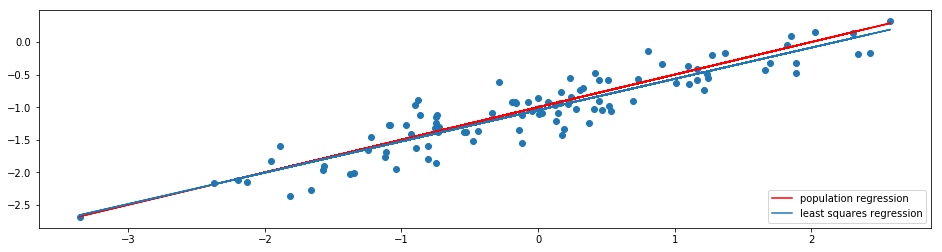

In [41]:
plt.figure(figsize=(16,4))
plt.scatter(x,y)
plt.plot(x,-1+0.5*x,color='r',label='population regression')
plt.plot(x,mod.params[0] + mod.params[1]*x, label='least squares regression')
plt.legend(loc='lower right')
plt.show()

__g.__ Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [42]:
df['x2'] = df['x']**2
mod_quad = smf.ols(formula='y ~ x + x2', data=df).fit()
mod_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     260.8
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           9.38e-40
Time:                        08:23:30   Log-Likelihood:                0.53509
No. Observations:                 100   AIC:                             4.930
Df Residuals:                      97   BIC:                             12.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0303      0.030    -34.111      0.000      -1.090      -0.970
x              0.4796      0.021     22.802      0.000       0.438       0.521
x2            -0.0115      0.013     -0.872      0.385      -0.038       0.015
==============================================================================
Omnibus:                        1.315   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                1.144
Skew:                           0.065   Prob(JB):                        0.564
Kurtosis:                       2.492   Cond. No.                         3.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-value there is no evidence of a quadratic relationship.

__h.__ Repeat __(a)–(f)__ after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in __(b)__. Describe your results.

__Answer:__ We would excpect the estimated values for the coefficients to be closer to the actual values with less noise in the data.

In [43]:
eps = np.random.normal(0,0.1,size = 100); y = -1 + 0.5 * x + eps
mod2 = smf.ols(formula='y ~ x',data=pd.DataFrame({'x' : x, 'y':y})).fit()
mod2.params

Intercept   -0.986963
x            0.510085
dtype: float64

__i.__ Repeat __(a)–(f)__ after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in __(b)__. Describe your results.

__Answer:__ We would expect the estimated values to be farther away from the actual values of the coefficients with more noise in the data because the true relationship can't be captured so easily.

In [44]:
eps = np.random.normal(0,1,size = 100); y = -1 + 0.5 * x + eps
mod3 = smf.ols(formula='y ~ x',data=pd.DataFrame({'x' : x, 'y':y})).fit()
mod3.params

Intercept   -0.946890
x            0.496754
dtype: float64

__j.__ What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [45]:
mod.conf_int()

,0,1
Intercept,-1.094183,-0.997289
x,0.438264,0.521621


In [46]:
mod2.conf_int()

,0,1
Intercept,-1.006795,-0.967131
x,0.493023,0.527146


In [47]:
mod3.conf_int()

,0,1
Intercept,-1.132123,-0.761658
x,0.337400,0.656109


The lengths of the confidence intervals becomes larger as the noise increases.

### 14

This problem focuses on the collinearity problem.

__a.__ Perform the following commands in R:  
```python
random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y  = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)```  
The last line corresponds to creating a linear model in which $y$ is a function of $x_1$ and $x_2$. Write out the form of the model. What are the regression coefficients?

In [48]:
random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(size=100) / 10
y  = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

The model is $Y = 2 + 2 X_1 + 0.3 X_2 + \epsilon$. The regression coefficients are $\beta_0 = 2$, $\beta_1 = 2$ and $\beta_3 = 0.3$.

__b.__ What is the correlation between $x_1$ and $x_2$ ? Create a scatterplot displaying the relationship between the variables.

In [49]:
np.corrcoef(x1,x2)

array([[1.        , 0.79679051],
       [0.79679051, 1.        ]])

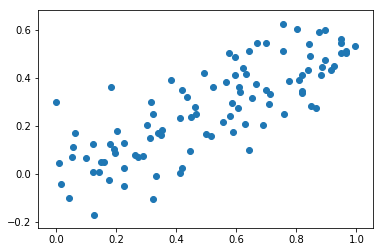

In [50]:
plt.scatter(x1,x2)

__c.__ Using this data, fit a least squares regression to predict $y$ using $x_1$ and $x_2$. Describe the results obtained. What are $\hat\beta_0$, $\hat\beta_1$, and $\hat\beta_2$? How do these relate to the true $\beta_0, \beta_1, \beta_2$ ? Can you reject the null hypothesis $H_0 : \beta_1 = 0$? How about the null hypothesis $H_0 : \beta_2 = 0$?

In [51]:
mod = smf.ols(formula = 'y ~ x1 + x2',data=pd.DataFrame({'x1':x1, 'x2': x2, 'y' : y})).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     17.40
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           3.50e-07
Time:                        08:23:30   Log-Likelihood:                -137.99
No. Observations:                 100   AIC:                             282.0
Df Residuals:                      97   BIC:                             289.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9728      0.204      9.674      0.000       1.568       2.378
x1             2.5894      0.574      4.515      0.000       1.451       3.728
x2            -1.1111      0.853     -1.303      0.196      -2.803       0.581
==============================================================================
Omnibus:                        1.127   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.784
Skew:                           0.209   Prob(JB):                        0.676
Kurtosis:                       3.113   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The values for $\hat\beta_0, \hat\beta_1 $ and $\hat\beta_2$ are $1.96, 2.36$ and $-0.16$ respectively. The hypothesis $H_0 : b_2 = 0$ can be rejected.

__d.__ Now fit a least squares regression to predict $y$ using only $x_1$ .Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [52]:
mod = smf.ols(formula = 'y ~ x1',data=pd.DataFrame({'x1':x1, 'x2': x2, 'y' : y})).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     32.86
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           1.10e-07
Time:                        08:23:30   Log-Likelihood:                -138.86
No. Observations:                 100   AIC:                             281.7
Df Residuals:                      98   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9773      0.205      9.663      0.000       1.571       2.383
x1             1.9938      0.348      5.732      0.000       1.304       2.684
==============================================================================
Omnibus:                        1.108   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.942
Skew:                           0.237   Prob(JB):                        0.624
Kurtosis:                       2.973   Cond. No.                         4.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The hypothesis can't be rejected.

__e.__ Now fit a least squares regression to predict $y$ using only $x_2$. Comment on your results. Can you reject the null hypothesis $H_0 : \beta_1 = 0$?

In [53]:
mod = smf.ols(formula = 'y ~ x2',data=pd.DataFrame({'x1':x1, 'x2': x2, 'y' : y})).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     12.03
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           0.000779
Time:                        08:23:30   Log-Likelihood:                -147.53
No. Observations:                 100   AIC:                             299.1
Df Residuals:                      98   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4734      0.187     13.205      0.000       2.102       2.845
x2             1.9556      0.564      3.469      0.001       0.837       3.074
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.255
Skew:                           0.122   Prob(JB):                        0.880
Kurtosis:                       2.963   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same as above, the hypothesis can't be rejected.

__f.__ Do the results obtained in __(c)–(e)__ contradict each other? Explain your answer.

The results do not contradict each other. Using both, $x_1$ and $x_2$ as predictors makes no sense because both values are highly correlated - the predictive power of the model does not improve. When based only on one predictor each one has a high predictiveness of the outcome.

__g.__ Now suppose we obtain one additional observation, which was unfortunately mismeasured.
```python
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)
```

Re-fit the linear models from __(c)__ to __(e)__ using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [54]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

ommitted

### 15

This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.

__a.__ For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.

In [55]:
boston = pd.read_csv(f'{PATH}Boston.csv',index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


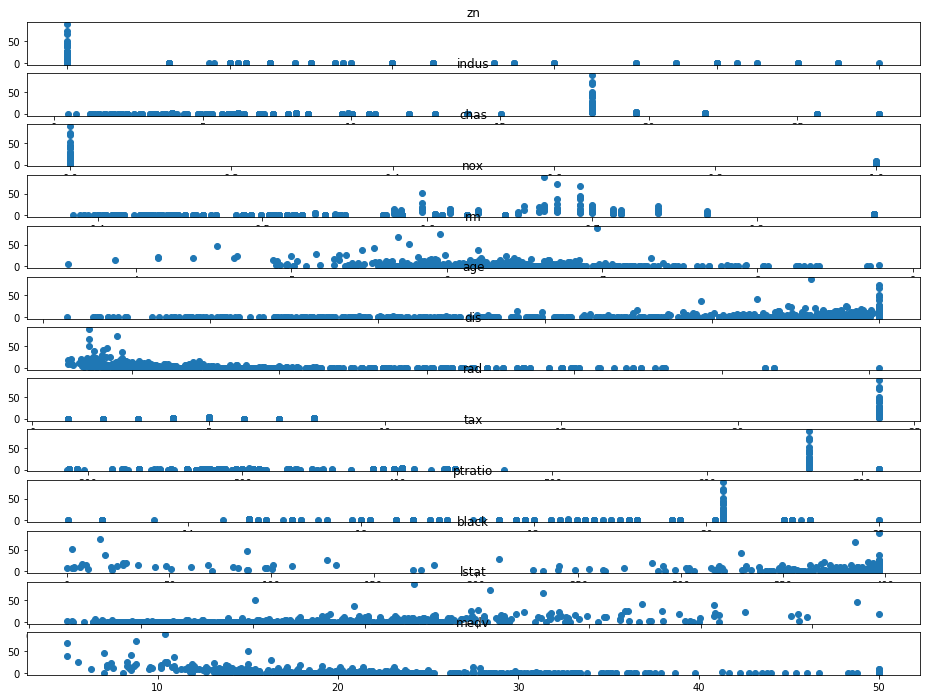

In [56]:
predictors = boston.drop('crim',axis=1).columns

_, axes = plt.subplots(nrows = len(predictors),figsize=(16,12))
coefs = {}
models = []
for i, predictor in enumerate(predictors):
    mod = smf.ols(formula = f'crim ~ {predictor}',data = boston).fit()
    models.append(mod)
    coefs[predictor] = mod.params[1] # store coef for later use
    axes[i].scatter(boston[predictor],boston['crim'])
    axes[i].set_title(predictor)

In [57]:
for mod in models:
    print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           5.51e-06
Time:                        08:23:31   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

There is a significant association between 'crim' and:
- zn
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- black
- lstat
- medv
The is no significant association between 'crim' and 'chas'.

__b.__ Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$.

In [58]:
mod = smf.ols(formula = 'crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv', data = boston).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           1.57e-56
Time:                        08:23:31   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The only significant predictors in this model are _dis_, _rad_ and _medv_.

__c.__ How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regres-
sion model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

__c.__ How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regres-
sion model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.

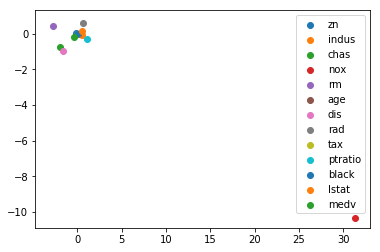

In [59]:
for k,v in coefs.items():
    plt.scatter(v,mod.params[k],label=k)
plt.legend(loc='upper right')

__d.__ Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
$Y = \beta_0 + \beta_1 X + \beta_2X^2 + \beta_3X^3 + \epsilon$.

In [60]:
for predictor in predictors:
    mod = smf.ols(formula=f'crim ~ {predictor} + np.power({predictor},2) + np.power({predictor},3)', data=boston).fit()
    print(mod.pvalues)

Intercept          4.113000e-26
zn                 2.612296e-03
np.power(zn, 2)    9.375050e-02
np.power(zn, 3)    2.295386e-01
dtype: float64
Intercept             2.036526e-02
indus                 5.297064e-05
np.power(indus, 2)    3.420187e-10
np.power(indus, 3)    1.196405e-12
dtype: float64
Intercept            1.239505e-19
chas                 2.094345e-01
np.power(chas, 2)    2.094345e-01
np.power(chas, 3)    2.094345e-01
dtype: float64
Intercept           1.311939e-11
nox                 2.758372e-13
np.power(nox, 2)    6.811300e-15
np.power(nox, 3)    6.961110e-16
dtype: float64
Intercept          0.081483
rm                 0.211756
np.power(rm, 2)    0.364109
np.power(rm, 3)    0.508575
dtype: float64
Intercept           0.357797
age                 0.142661
np.power(age, 2)    0.047377
np.power(age, 3)    0.006680
dtype: float64
Intercept           1.633088e-30
dis                 6.374792e-18
np.power(dis, 2)    4.941214e-12
np.power(dis, 3)    1.088832e-08
dtype: float64